# 05. Fourier Transform
(work in progress)

In [1]:
%pylab inline
from IPython.display import Audio
style.use('seaborn') #more beautiful plots

Populating the interactive namespace from numpy and matplotlib


## Discrete Cosine Transform (DCT)
https://en.wikipedia.org/wiki/Discrete_cosine_transform

$X_k =
 \sum_{n=0}^{N-1} x_n \cos \left[\frac{\pi}{N} \left(n+\frac{1}{2}\right) k \right] \quad \quad k = 0, \dots, N-1.$

In [2]:
sr = 44100
T = 0.0015
N = int(T* sr)
n = arange(N)
t = n/sr

In [3]:
def DCT(x):
    X = zeros_like(x)
    N = len(x)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] *cos( pi/N * (1/2 +n) *k )
    return X

In [4]:
testSig = zeros(N)
testSig+=cos(2*pi*t*sr/4) # cos at nyq/2 should come out centered

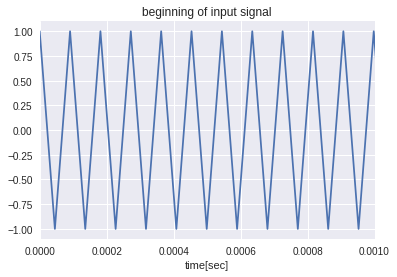

In [5]:
plot(t, testSig)
xlim([0, 0.001])
title('beginning of input signal')
xlabel('time[sec]')
show()

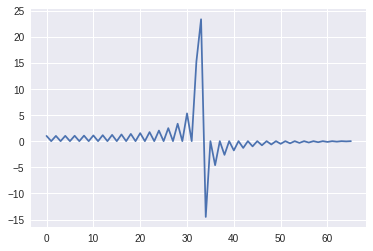

In [6]:
plot(DCT(testSig))
show()

## Discrete Fourier Transform (DFT)
- https://en.wikipedia.org/wiki/Discrete_Fourier_transform
- https://en.wikipedia.org/wiki/Fourier_transform

${\displaystyle {\begin{aligned}X_{k}&=\sum _{n=0}^{N-1}x_{n}\cdot e^{-{\frac {i2\pi }{N}}kn}\\&=\sum _{n=0}^{N-1}x_{n}\cdot \left[\cos \left({\frac {2\pi }{N}}kn\right)-i\cdot \sin \left({\frac {2\pi }{N}}kn\right)\right],\end{aligned}}}$

In [7]:
def DFT(x):
    N = len(x)
    X = zeros(N).astype(np.complex)
    
    for k in range(N):
        for n in range(N):
            X[k]= X[k] + x[n]*exp(k*n*((-1j * 2 * pi)/N)  )
    return X

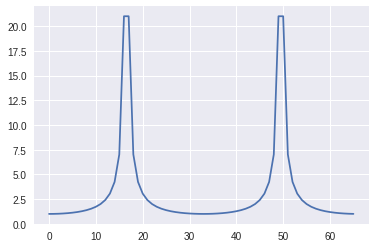

In [8]:
dftRes = DFT(testSig)
plot(abs(dftRes))
show()

The fft's result gives the frequency spectrum but it repeats after $\frac{N}{2}$,
So we drop half of its values and create a requency axis for the plot:

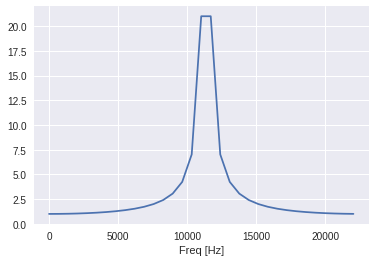

In [9]:
absHalfDFT = abs(dftRes[0:int(N/2)])
freqAxis = linspace(0, sr/2, int(N/2))
plot(freqAxis, absHalfDFT)
xlabel('Freq [Hz]')
show()

## attempt to get more frequency resolution

In [10]:
def DFThiRes(x, factor=2):
    N = len(x)
    M = int(N*factor) # factor higher freq precision
    X = zeros(M).astype(np.complex)
    
    for k in range(M):
        for n in range(N):
            X[k]= X[k] + x[n]*exp((k/factor)*n*((-1j * 2 * pi)/N)  )
    return X

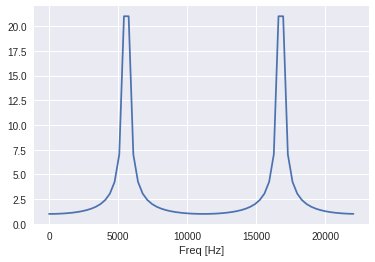

In [11]:
dftResHi = DFThiRes(testSig)
halfLength =int(len(dftResHi)/2)
absHalfDFT = abs(dftRes[0:halfLength])
freqAxis = linspace(0, sr/2, halfLength)
plot(freqAxis, absHalfDFT)
xlabel('Freq [Hz]')
show()

## Comparison

We create a very short signal ($N=66$) and fill it with two hio frequent sine waves that are rather close to each other. As expected, the fourer transform gives us one peak (because the two frequencies are close to each other).
We can use our new function ```DFThiRes``` and see if the increased frequency resolution actually makes it possible to distinguish the two frequencies (giving two peaks). I we succeeded we should not only get a longer array but also the two peaks.


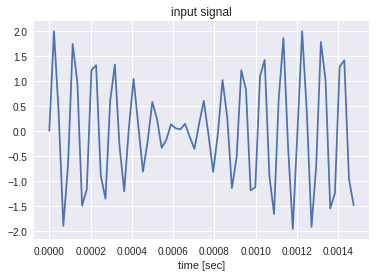

In [30]:
sr = 44100
T = 0.0015
N = int(T* sr)
n = arange(N)
t = n/sr

testSig = zeros(N)
testSig += sin(t*2*pi*10000)
testSig += sin(t*2*pi*10800)
plot(t, testSig)
xlabel('time [sec]')
title('input signal')
show()

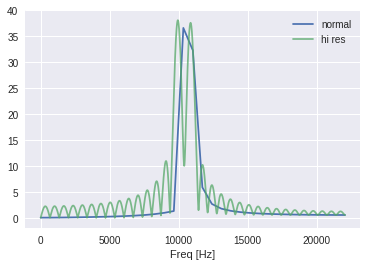

In [27]:
dftRes = DFT(testSig)
absHalfDFT = abs(dftRes[0:int(N/2)])
freqAxis = linspace(0, sr/2, int(N/2))
plot(freqAxis, absHalfDFT, label='normal')
xlabel('Freq [Hz]')



dftResHi = DFThiRes(testSig, factor=180)
halfLength =int(len(dftResHi)/2)
absHalfDFT = abs(dftResHi[0:halfLength])
freqAxis = linspace(0, sr/2, halfLength)
plot(freqAxis, absHalfDFT, label='hi res', alpha=0.75)

legend()

show()

indeed we can see two peaks, indicating that it works. The artifacts (all the small peaks) seem to indicate that our attempt is only partially successful though. They seem to be *spectral leaking*, so inaccuray in the spectral measurement. At this point this is only assumtions but it seems that the increased resolution we got caused a different kind of problems. A trade-off essentially.